In [24]:
%matplotlib inline
from syk_susy_2 import *
import numpy as np
from numpy import linalg as LA
import scipy.linalg as SLA
import matplotlib.pyplot as plt
import manipulate
from importlib import reload
reload(manipulate)
import math

In [2]:
H = hamiltonian(9,1)
w, v = manipulate.eigen(H)

In [3]:
w = manipulate.set_zeros(w)
Ha = manipulate.reconstruct(w,v)
print(np.min(Ha-H))

(-8.881784197e-15-3.46944695195e-17j)


In [4]:
ngs = sum(w==0)
tot_gs = np.copy(v[:,0])
for i in range(1,ngs):
    tot_gs += v[:,i]
tot_gs = tot_gs/math.sqrt(ngs)
# print(tot_gs)

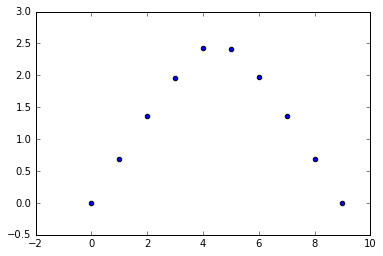

In [31]:
rho = manipulate.density_mat(tot_gs)
entropies = np.zeros(10)
rhoi = np.copy(rho)
for idx, val in enumerate(entropies):
    if idx != 0: rhoi = manipulate.single_trace(rhoi)
    entropies[idx] = manipulate.entropy(rhoi)
np.savetxt("../data/N%sentropy" % 9, np.transpose(entropies))
plt.scatter(range(10), entropies)

In [14]:
entropies[4]

nan

For different values of $N$

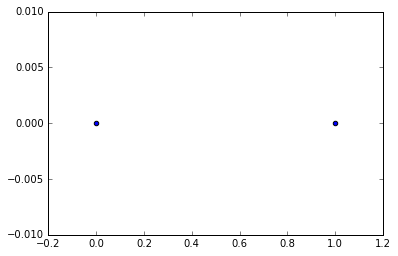

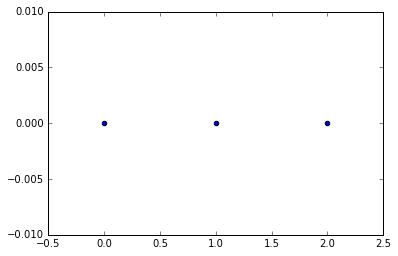

N =  2 entropy[2] =  -0.0


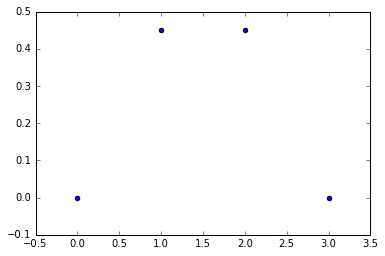

N =  3 entropy[2] =  0.450561208866


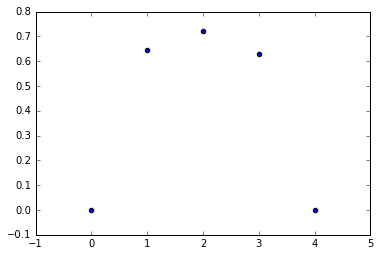

N =  4 entropy[2] =  0.720183942707


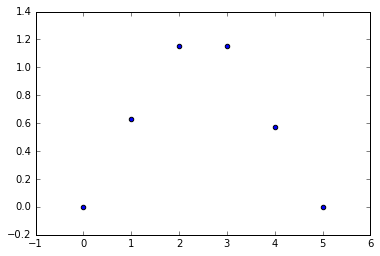

N =  5 entropy[2] =  1.15447056372


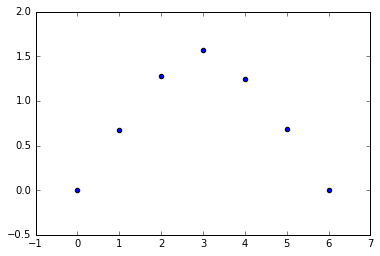

N =  6 entropy[2] =  1.27642672076


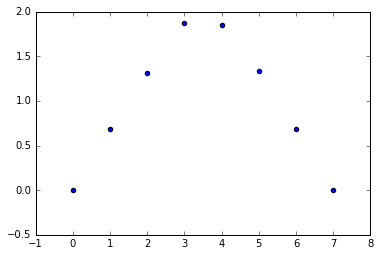

N =  7 entropy[2] =  1.31715035475


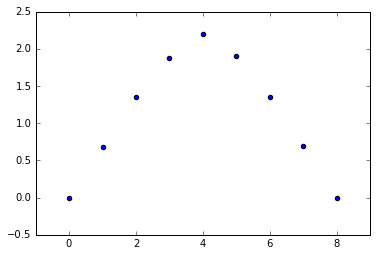

N =  8 entropy[2] =  1.34587169151


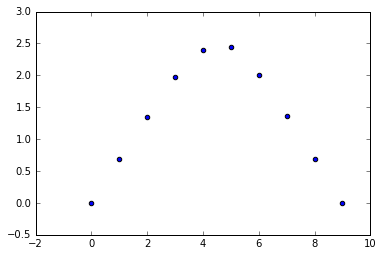

N =  9 entropy[2] =  1.34999786034


In [34]:
for N in [1,2,3,4,5,6,7,8,9]:
    H = hamiltonian(N,1)
    w, v = manipulate.eigen(H)
    w = manipulate.set_zeros(w)
    ngs = sum(w==0)
    tot_gs = np.copy(v[:,0])
    for i in range(1,ngs):
        tot_gs += v[:,i]
    tot_gs = tot_gs/math.sqrt(ngs)
    rho = manipulate.density_mat(tot_gs)
    entropies = np.zeros(N+1)
    rhoi = np.copy(rho)
    for idx, val in enumerate(entropies):
        if idx != 0: rhoi = manipulate.single_trace(rhoi)
        entropies[idx] = manipulate.entropy(rhoi)
    plt.scatter(range(N+1), entropies)
    np.savetxt("../data/N0%sentropy.txt" % N, np.transpose(entropies))
    plt.savefig("../data/entropy0%s.pdf" % N)
    plt.show()
    if N>1: print("N = ", N, "entropy[2] = ", entropies[2])

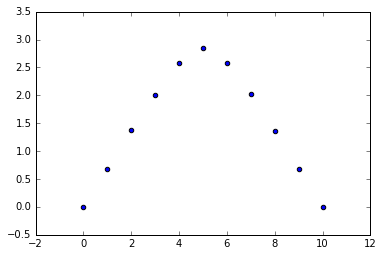

N =  10 entropy[2] =  1.37229969721


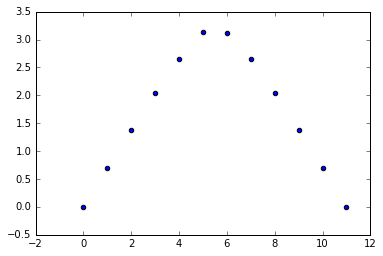

N =  11 entropy[2] =  1.37567251584


In [35]:
for N in [10, 11]:
    H = hamiltonian(N,1)
    w, v = manipulate.eigen(H)
    w = manipulate.set_zeros(w)
    ngs = sum(w==0)
    tot_gs = np.copy(v[:,0])
    for i in range(1,ngs):
        tot_gs += v[:,i]
    tot_gs = tot_gs/math.sqrt(ngs)
    rho = manipulate.density_mat(tot_gs)
    entropies = np.zeros(N+1)
    rhoi = np.copy(rho)
    for idx, val in enumerate(entropies):
        if idx != 0: rhoi = manipulate.single_trace(rhoi)
        entropies[idx] = manipulate.entropy(rhoi)
    plt.scatter(range(N+1), entropies)
    np.savetxt("../data/N%sentropy.txt" % N, np.transpose(entropies))
    plt.savefig("../data/entropy%s.pdf" % N)
    plt.show()
    if N>1: print("N = ", N, "entropy[2] = ", entropies[2])

Getting average values

In [54]:
N = 10
entropy = np.zeros(N+1)
I = 10
for i in range(I):
    H = hamiltonian(N,1)
    w, v = manipulate.eigen(H)
    w = manipulate.set_zeros(w)
    ngs = sum(w==0)
    tot_gs = np.copy(v[:,0])
    for i in range(1,ngs):
        tot_gs += v[:,i]
    tot_gs = tot_gs/math.sqrt(ngs)
    rho = manipulate.density_mat(tot_gs)
    entropies = np.zeros(N+1)
    rhoi = np.copy(rho)
    for idx, val in enumerate(entropies):
        if idx != 0: rhoi = manipulate.single_trace(rhoi)
        entropies[idx] = manipulate.entropy(rhoi)
    entropy = entropy + entropies
np.savetxt("../data/N0%savg_entropy.txt" % N, np.transpose(entropy/I))